In [29]:
# ================================
# 📦 IMPORTING LIBRARIES
# ================================
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

# Custom palettes
light_palette = sns.color_palette("pastel")
dark_palette = sns.color_palette("dark")


In [7]:
# Load dataset
df = pd.read_csv("Global_AI_Content_Impact_Dataset.csv")
df

,Country,Year,Industry,AI Adoption Rate (%),AI-Generated Content Volume (TBs per year),Job Loss Due to AI (%),Revenue Increase Due to AI (%),Human-AI Collaboration Rate (%),Top AI Tools Used,Regulation Status,Consumer Trust in AI (%),Market Share of AI Companies (%)
0,South Korea,2022,Media,44.29,33.09,16.77,46.12,74.79,Bard,Strict,40.77,18.73
1,China,2025,Legal,34.75,66.74,46.89,52.46,26.17,DALL-E,Strict,35.67,35.02
2,USA,2022,Automotive,81.06,96.13,10.66,45.60,39.66,Stable Diffusion,Moderate,54.47,22.76
3,France,2021,Legal,85.24,93.76,27.70,78.24,29.45,Claude,Moderate,51.84,1.93
4,France,2021,Gaming,78.95,45.62,17.45,1.05,21.70,Midjourney,Strict,41.77,21.41
...,...,...,...,...,...,...,...,...,...,...,...,...
195,Germany,2021,Automotive,89.44,52.98,48.47,12.14,30.60,DALL-E,Lenient,77.21,44.35
196,Germany,2020,Media,70.11,28.26,27.62,57.86,58.71,DALL-E,Strict,78.74,31.73
197,France,2023,Marketing,65.77,49.83,39.94,79.44,43.73,Synthesia,Lenient,81.58,14.62
198,Australia,2023,Automotive,45.35,20.49,33.21,50.50,41.73,Claude,Strict,47.42,43.11


In [11]:
df.shape

(200, 12)

In [19]:
df.size

2400

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 12 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country                                     200 non-null    object 
 1   Year                                        200 non-null    int64  
 2   Industry                                    200 non-null    object 
 3   AI Adoption Rate (%)                        200 non-null    float64
 4   AI-Generated Content Volume (TBs per year)  200 non-null    float64
 5   Job Loss Due to AI (%)                      200 non-null    float64
 6   Revenue Increase Due to AI (%)              200 non-null    float64
 7   Human-AI Collaboration Rate (%)             200 non-null    float64
 8   Top AI Tools Used                           200 non-null    object 
 9   Regulation Status                           200 non-null    object 
 10  Consumer Trust

In [15]:
df.describe()

,Year,AI Adoption Rate (%),AI-Generated Content Volume (TBs per year),Job Loss Due to AI (%),Revenue Increase Due to AI (%),Human-AI Collaboration Rate (%),Consumer Trust in AI (%),Market Share of AI Companies (%)
count,200.000000,200.000000,200.00000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,2022.315000,54.265850,46.07260,25.788250,39.719450,54.102150,59.425150,26.569550
std,1.825496,24.218067,29.16122,13.901105,23.829545,19.247079,17.319668,14.023729
min,2020.000000,10.530000,1.04000,0.090000,0.140000,20.210000,30.120000,1.180000
25%,2021.000000,33.222500,20.32250,14.995000,17.907500,37.770000,44.755000,14.052500
50%,2022.000000,53.310000,44.32000,25.735000,42.100000,54.515000,59.215000,27.390000
75%,2024.000000,76.220000,71.62000,37.417500,58.697500,69.402500,74.885000,38.432500
max,2025.000000,94.760000,99.06000,49.710000,79.550000,88.290000,89.880000,49.280000


In [17]:
df.duplicated().sum()

0

In [21]:
df.isnull().sum()

Country                                       0
Year                                          0
Industry                                      0
AI Adoption Rate (%)                          0
AI-Generated Content Volume (TBs per year)    0
Job Loss Due to AI (%)                        0
Revenue Increase Due to AI (%)                0
Human-AI Collaboration Rate (%)               0
Top AI Tools Used                             0
Regulation Status                             0
Consumer Trust in AI (%)                      0
Market Share of AI Companies (%)              0
dtype: int64

In [ ]:
# EDA

In [33]:
# Separate columns
num_cols = df.select_dtypes(include=np.number).columns.tolist()
cat_cols = df.select_dtypes(include='object').columns.tolist()


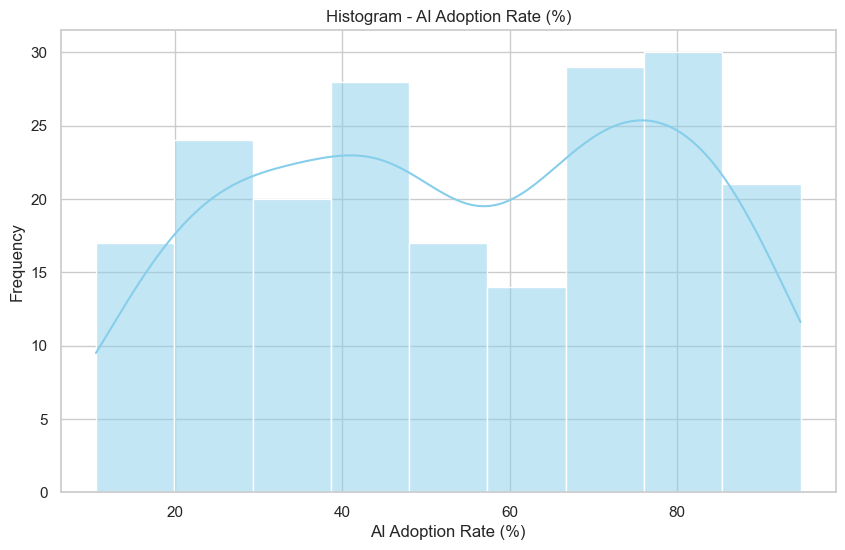

In [49]:
# EDA Graph 1: Histogram
sns.histplot(df['AI Adoption Rate (%)'], kde=True, color='skyblue')
plt.title("Histogram - AI Adoption Rate (%)")
plt.xlabel("AI Adoption Rate (%)")
plt.ylabel("Frequency")
plt.show()


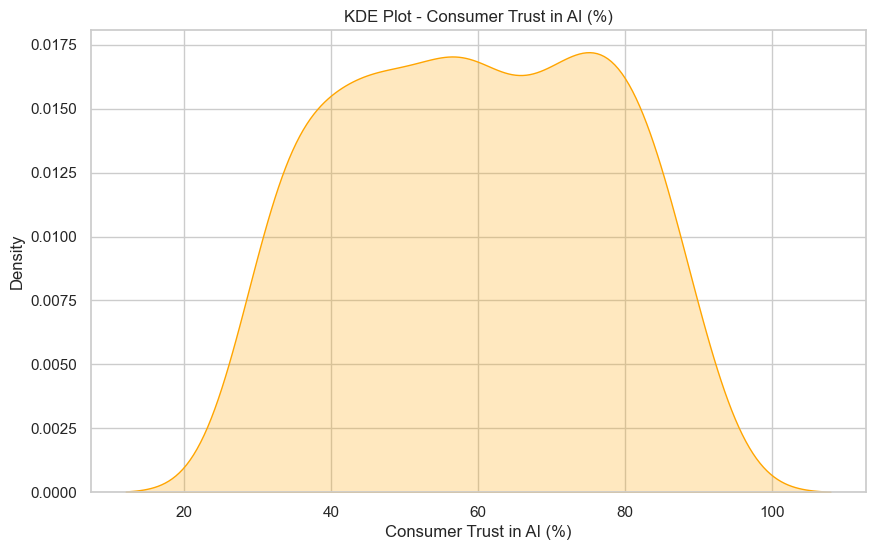

In [51]:
# EDA Graph 2: KDE Plot
sns.kdeplot(df['Consumer Trust in AI (%)'], color='orange', fill=True)
plt.title("KDE Plot - Consumer Trust in AI (%)")
plt.xlabel("Consumer Trust in AI (%)")
plt.ylabel("Density")
plt.show()


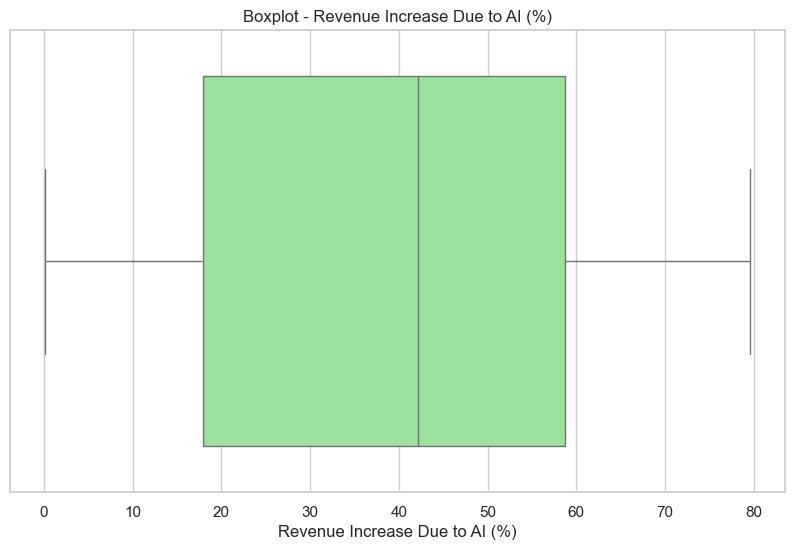

In [53]:
# EDA Graph 3: Box Plot
sns.boxplot(x=df['Revenue Increase Due to AI (%)'], color='lightgreen')
plt.title("Boxplot - Revenue Increase Due to AI (%)")
plt.xlabel("Revenue Increase Due to AI (%)")
plt.show()

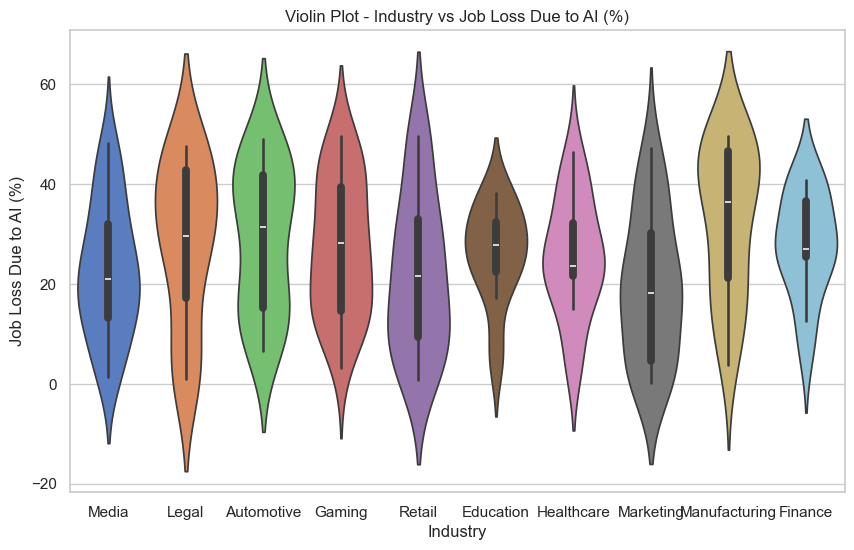

In [57]:
# EDA Graph 4: Violin Plot
sns.violinplot(x='Industry', y='Job Loss Due to AI (%)', data=df, hue='Industry', palette='muted', legend=False)
plt.title("Violin Plot - Industry vs Job Loss Due to AI (%)")
plt.xlabel("Industry")
plt.ylabel("Job Loss Due to AI (%)")
plt.show()


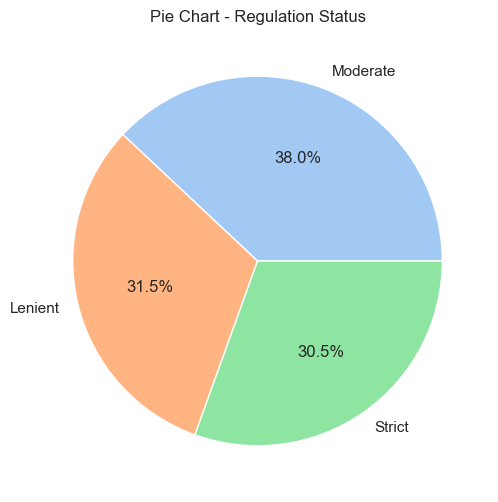

In [59]:
# EDA Graph 5: Pie Chart
df['Regulation Status'].value_counts().plot.pie(autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title("Pie Chart - Regulation Status")
plt.ylabel('')
plt.show()

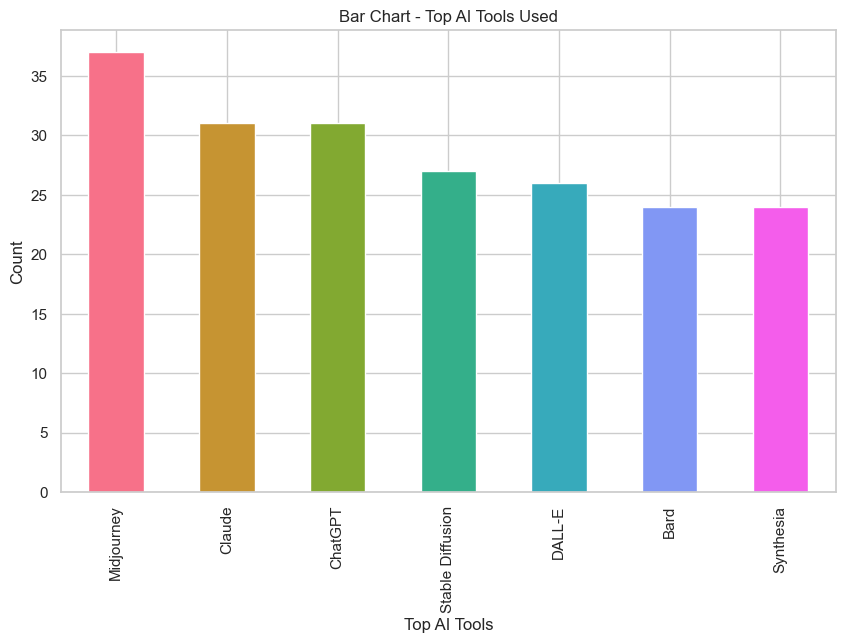

In [63]:
# EDA Graph 6: Bar Chart
color_list = sns.color_palette('husl', n_colors=len(df['Top AI Tools Used'].value_counts()))
df['Top AI Tools Used'].value_counts().plot(kind='bar', color=color_list)
plt.title("Bar Chart - Top AI Tools Used")
plt.xlabel("Top AI Tools")
plt.ylabel("Count")
plt.show()

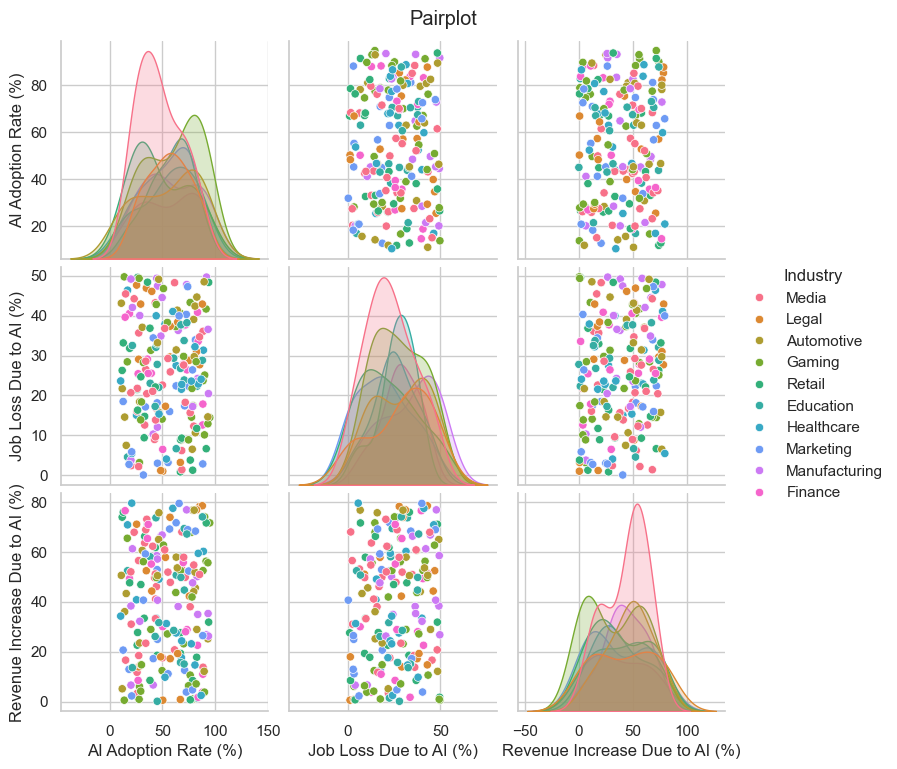

In [77]:
# EDA Graph 8: Pair Plot
sns.pairplot(df, vars=['AI Adoption Rate (%)', 'Job Loss Due to AI (%)', 'Revenue Increase Due to AI (%)'], hue='Industry', palette='husl')
plt.suptitle("Pairplot", y=1.02)
plt.show()


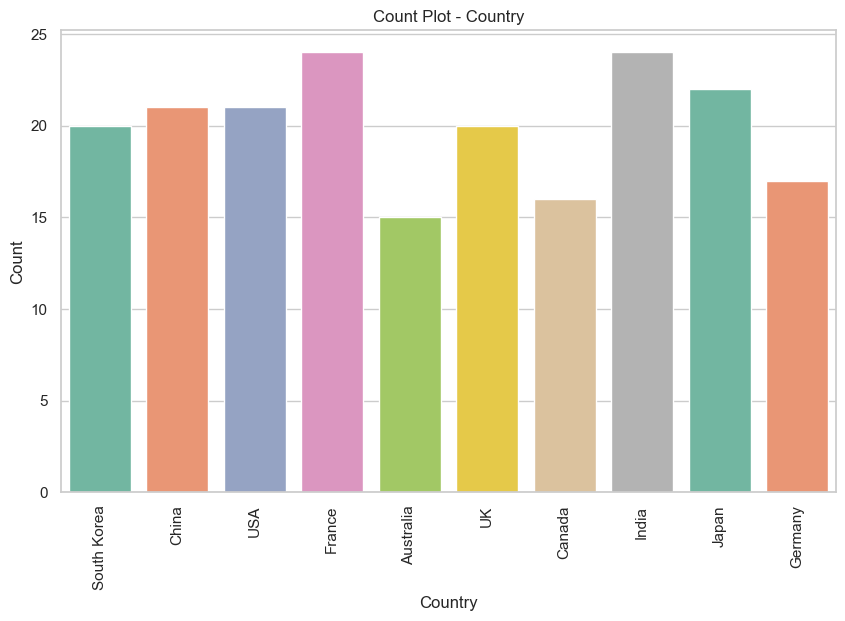

In [69]:
# EDA Graph 7: Count Plot
sns.countplot(x='Country', data=df, hue='Country', palette='Set2', legend=False)
plt.title("Count Plot - Country")
plt.xlabel("Country")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()

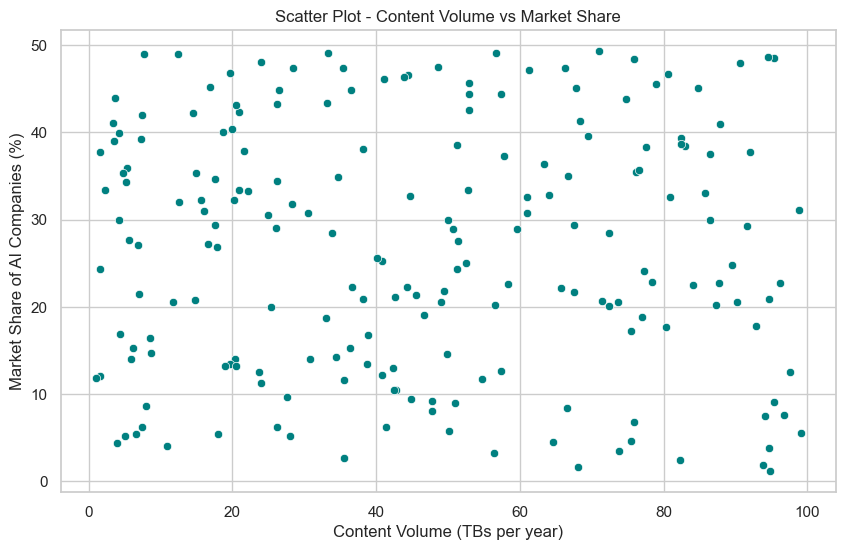

In [81]:
# EDA Graph 10: Scatter Plot
sns.scatterplot(x='AI-Generated Content Volume (TBs per year)', y='Market Share of AI Companies (%)', data=df, color='teal')
plt.title("Scatter Plot - Content Volume vs Market Share")
plt.xlabel("Content Volume (TBs per year)")
plt.ylabel("Market Share of AI Companies (%)")
plt.show()

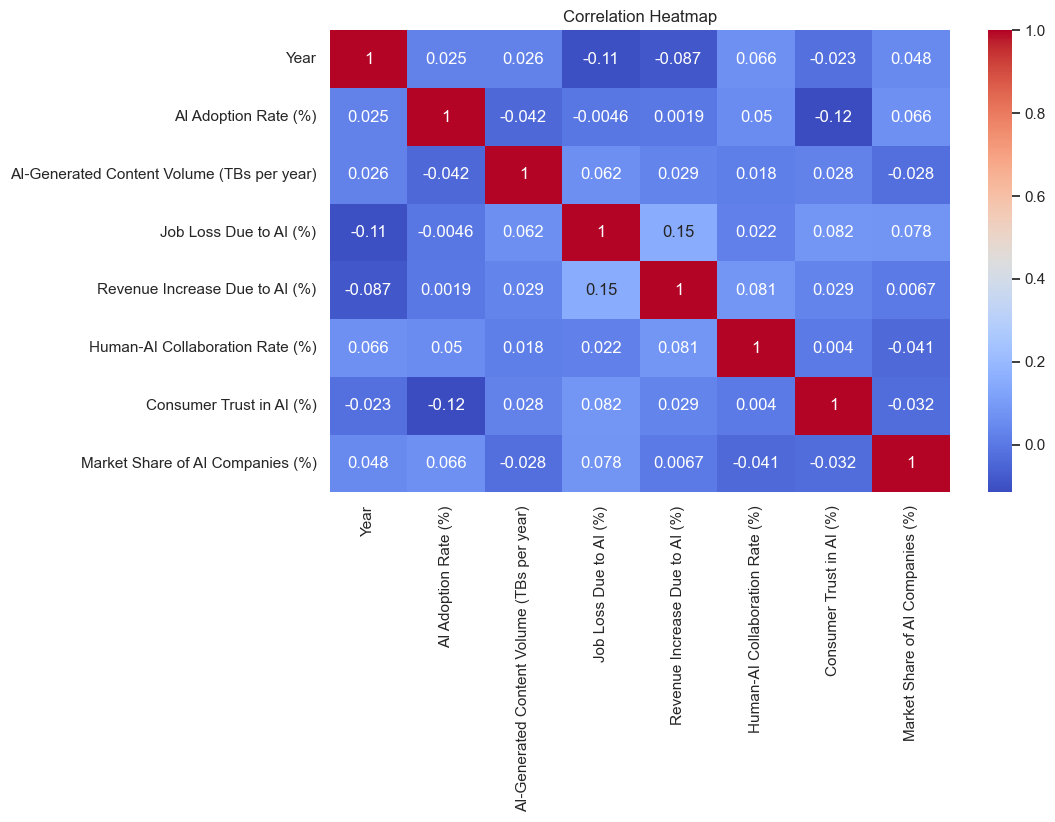

In [79]:
# EDA Graph 9: Correlation Heatmap
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


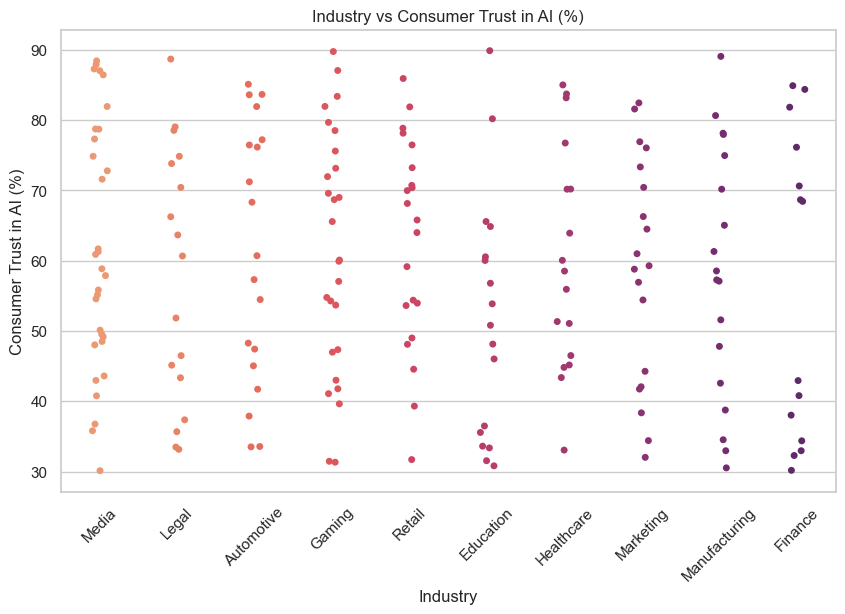

In [98]:
# EDA Graph 11: Strip Plot
sns.stripplot(x='Industry', y='Consumer Trust in AI (%)', data=df, hue='Industry', palette='flare', legend=False)
plt.title("Industry vs Consumer Trust in AI (%)")
plt.xlabel("Industry")
plt.ylabel("Consumer Trust in AI (%)")
plt.xticks(rotation=45)
plt.show()


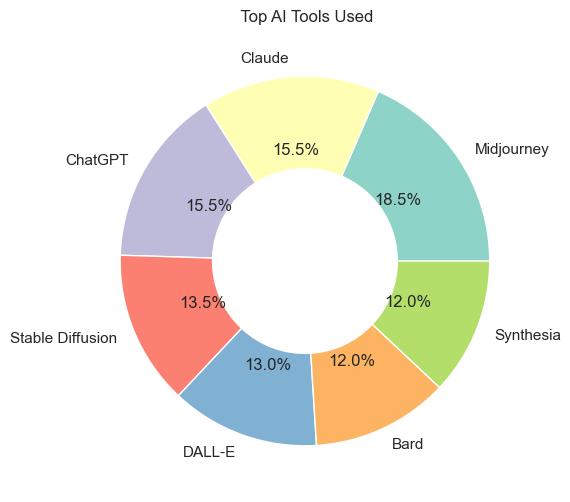

In [108]:
# EDA Graph 21: Donut Chart - Top AI Tools Used
df['Top AI Tools Used'].value_counts().plot.pie(autopct='%1.1f%%', colors=sns.color_palette('Set3'), wedgeprops={'width':0.5})
plt.title(" Top AI Tools Used")
plt.ylabel('')
plt.show()

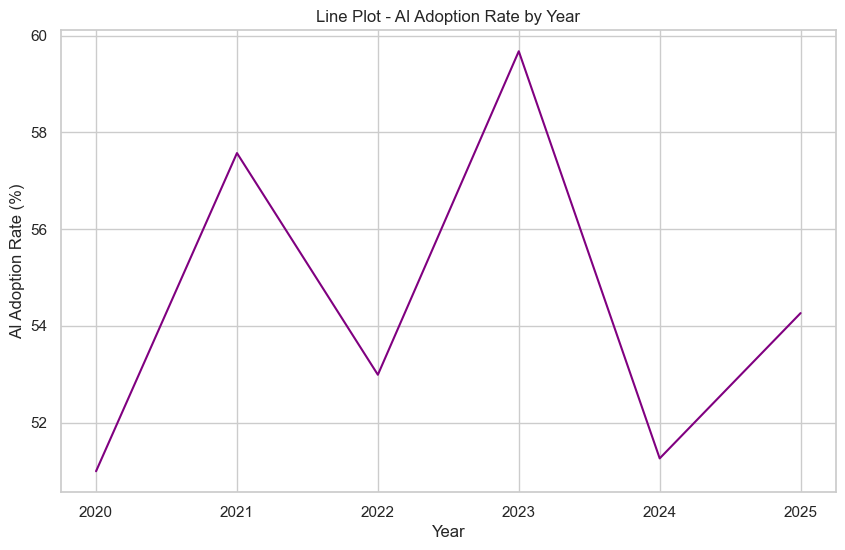

In [114]:
# EDA Graph 13: Line Plot
df.groupby('Year')['AI Adoption Rate (%)'].mean().plot(kind='line', color='purple')
plt.title("Line Plot - AI Adoption Rate by Year")
plt.xlabel("Year")
plt.ylabel("AI Adoption Rate (%)")
plt.show()

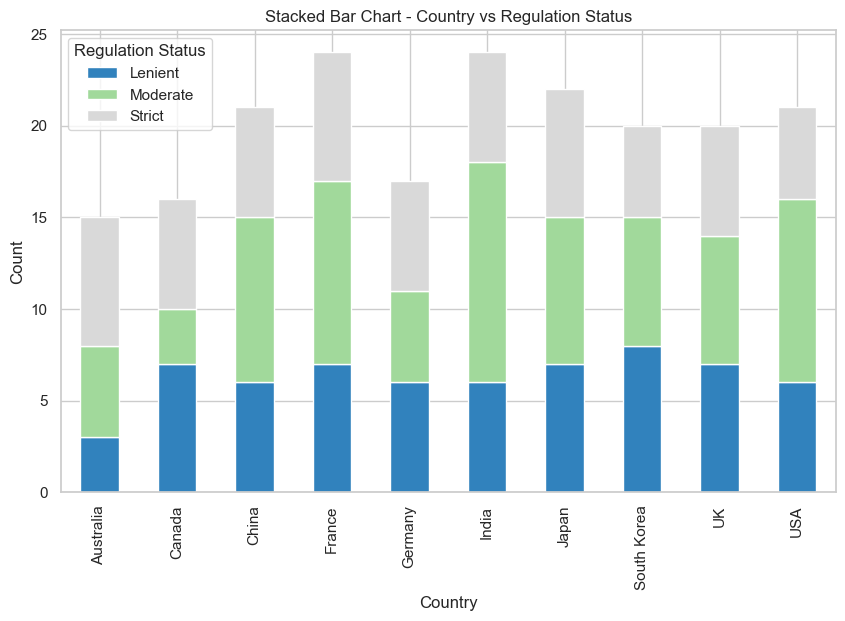

In [120]:
# EDA Graph 16: Stacked Bar Chart
pd.crosstab(df['Country'], df['Regulation Status']).plot(kind='bar', stacked=True, colormap='tab20c')
plt.title("Stacked Bar Chart - Country vs Regulation Status")
plt.xlabel("Country")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()

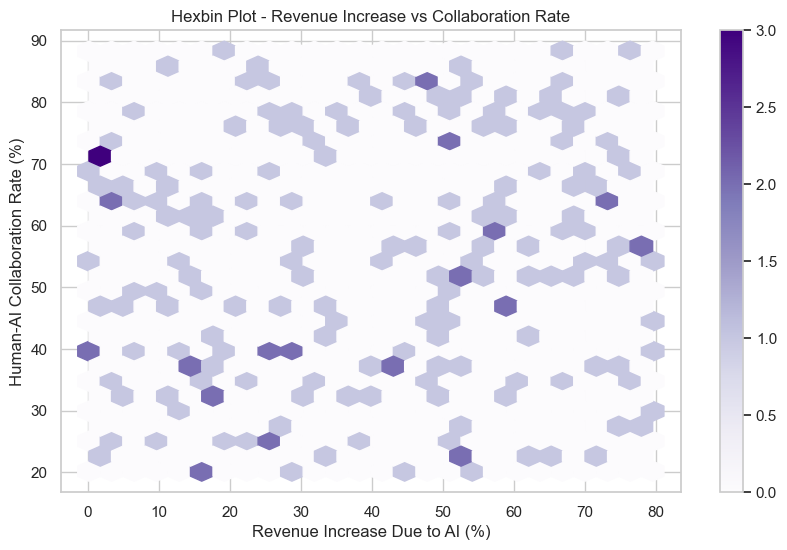

In [122]:
# EDA Graph 17: Hexbin Plot
df.plot.hexbin(x='Revenue Increase Due to AI (%)', y='Human-AI Collaboration Rate (%)', gridsize=25, cmap='Purples')
plt.title("Hexbin Plot - Revenue Increase vs Collaboration Rate")
plt.xlabel("Revenue Increase Due to AI (%)")
plt.ylabel("Human-AI Collaboration Rate (%)")
plt.show()


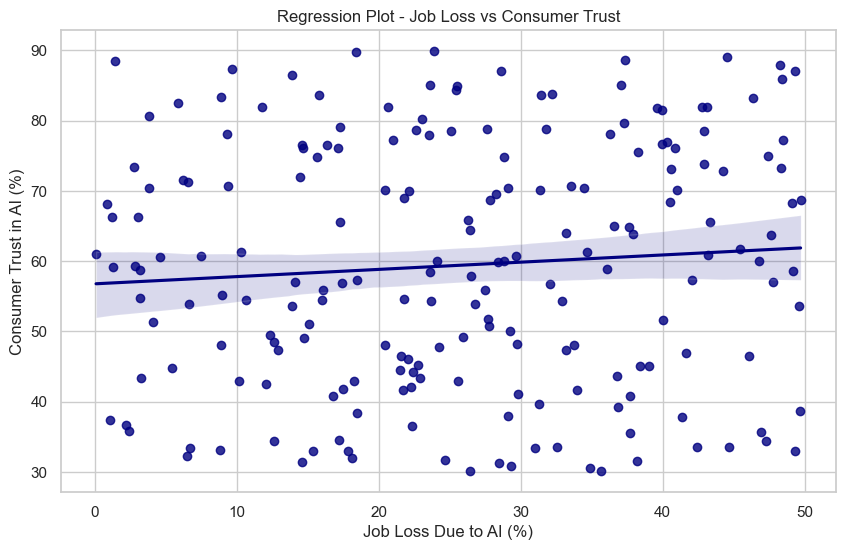

In [124]:
# EDA Graph 18: Regression Plot
sns.regplot(x='Job Loss Due to AI (%)', y='Consumer Trust in AI (%)', data=df, color='navy')
plt.title("Regression Plot - Job Loss vs Consumer Trust")
plt.xlabel("Job Loss Due to AI (%)")
plt.ylabel("Consumer Trust in AI (%)")
plt.show()

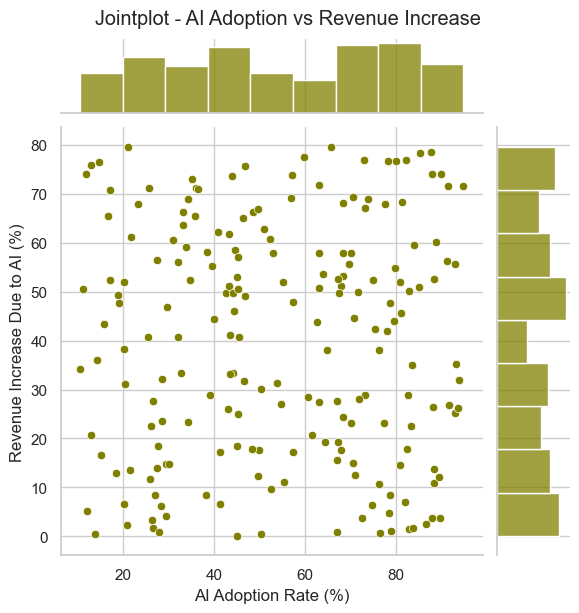

In [126]:
# EDA Graph 19: Joint Plot
sns.jointplot(x='AI Adoption Rate (%)', y='Revenue Increase Due to AI (%)', data=df, kind='scatter', color='olive')
plt.suptitle("Jointplot - AI Adoption vs Revenue Increase", y=1.02)
plt.show()


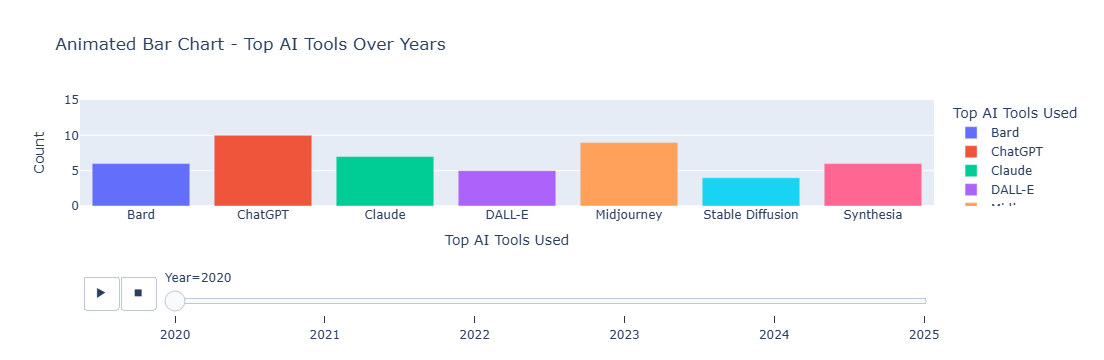

In [138]:
# Example structure using plotly express
import plotly.express as px

tool_year_count = df.groupby(['Year', 'Top AI Tools Used']).size().reset_index(name='Count')
fig = px.bar(tool_year_count, 
             x='Top AI Tools Used', 
             y='Count', 
             color='Top AI Tools Used', 
             animation_frame='Year', 
             range_y=[0, tool_year_count['Count'].max()+5],
             title='Animated Bar Chart - Top AI Tools Over Years')
fig.show()
